# Ассоциативные правила

Интеллектуальный анализ ассоциативных правил - это метод определения взаимосвязей между различными элементами.

Обучение на ассоциативных правилах (Associations rules learning — ARL) представляет из себя, с одной стороны, простой, с другой — довольно часто применимый в реальной жизни метод поиска взаимосвязей (ассоциаций) в датасетах, или, если точнее, айтемсетах (itemsests).

Интелектуальный анализ данных имеет огромную практическую пользу.
Например, можно получить больше прибыли, если определить взаимосвязь между товарами, купленными в разных транзакциях.

Например, если товары A и B покупаются вместе чаще, можно предпринять несколько шагов для увеличения прибыли:

* A и B можно разместить вместе, чтобы, когда покупатель покупает один из продуктов, ему не нужно было далеко уходить, чтобы купить другой продукт.
* Люди, которые покупают один из продуктов, могут быть нацелены на покупку другого с помощью рекламной кампании.
* На эти продукты могут быть предложены коллективные скидки, если покупатель купит их оба.
* И A, и B могут быть упакованы вместе.

Рассмотрим реализации 3 основных алгоритма (Apriori, ECLAT, FP-Growth).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('C:/Users/User/Desktop/Untitled Folder/task_1_Associations_rules/dataset/Market_Basket_Optimisation.csv', header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(7501, 20)

In [5]:
# Набор данных содержит товары, купленные покупателем, т.е. каждая строка представляет одного покупателя.

# Преобразуем фрейм данных в список списков, как того требует алгоритм априори.

In [6]:
transactions = []
for i in range(0, 100): 
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

In [7]:
# удаляем первую строку, так как она содержит заголовки 
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil']]

## Apriori

Алгоритм apriori состоит из трех основных компонентов:
* Support

относится к популярности элемента по умолчанию и может быть рассчитана путем нахождения количества транзакций, содержащих конкретный элемент, деленного на общее количество транзакций:

Support(B) = (Transactions containing (B))/(Total Transactions)

* Confidence

относится к вероятности того, что предмет B также будет куплен, если куплен предмет A. Его можно рассчитать, найдя количество транзакций, по которым A и B покупаются вместе, разделенное на общее количество транзакций, по которым был куплен A:

Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)

* Lift

относится к увеличению доли продаж B при продаже A. Подъем (A -> B) можно рассчитать путем деления Confidence(A -> B)на Support(B): 

Lift(A→B) = (Confidence (A→B))/(Support (B))


Этот процесс может быть очень медленным из-за количества комбинаций. Чтобы ускорить процесс, нам необходимо выполнить следующие действия:
1. Установите минимальное значение поддержки и уверенности. Это означает, что нас интересует только поиск правил для элементов, которые имеют определенное существование по умолчанию (например, поддержку) и имеют минимальное значение для совместной встречаемости с другими элементами (например, достоверность).
2. Извлеките все подмножества, имеющие более высокое значение поддержки, чем минимальный порог.
3. Выберите все правила из подмножеств со значением достоверности выше минимального порога.
4. Закажите правила в порядке убывания Lift.

In [8]:
import apyori
from apyori import apriori

In [9]:
# и обучимся правилам. Обратите внимание, что пороговые значения мы вибираем сами в зависимости от того, /
# насколкьо "сильные" правила мы хотим получить
# min_support -- минимальный support для правил (dtype = float).
# min_confidence -- минимальное значение confidence для правил (dtype = float)
# min_lift -- минимальный lift (dtype = float)
# max_length -- максимальная длина itemset (вспоминаем про k-itemset)  (dtype = integer) 
rules=apriori(transactions,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2,max_length=2)

In [10]:
%%time
results=list(rules)
results

Wall time: 19 ms


[RelationRecord(items=frozenset({'almonds', 'antioxydant juice'}), support=0.01, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'antioxydant juice'}), confidence=0.5, lift=50.0), OrderedStatistic(items_base=frozenset({'antioxydant juice'}), items_add=frozenset({'almonds'}), confidence=1.0, lift=50.0)]),
 RelationRecord(items=frozenset({'avocado', 'almonds'}), support=0.01, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'avocado'}), confidence=0.5, lift=6.25)]),
 RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.01, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.5, lift=5.0)]),
 RelationRecord(items=frozenset({'cookies', 'almonds'}), support=0.01, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'cookies'}), confidence=0.5, lift=5.0)]),
 RelationRecord(items=frozense

### Visualization of Results

### 1 способ

In [11]:
lhs,rhs,support,confidence,lift=[],[],[],[],[]
for result in results:
    lhs.append(tuple(result[2][0][0])[0])
    rhs.append(tuple(result[2][0][1])[0])
    support.append(result[1])
    confidence.append(result[2][0][2])
    lift.append(result[2][0][3])

In [12]:
columns=list(zip(lhs,rhs,support,confidence,lift))

In [13]:
# Converting into dataframe


result_df=pd.DataFrame(columns)
result_df.columns=['Item1','Item2','Support','Confidence','Lift']
result_df

,Item1,Item2,Support,Confidence,Lift
0,almonds,antioxydant juice,0.01,0.500000,50.000000
1,almonds,avocado,0.01,0.500000,6.250000
2,almonds,burgers,0.01,0.500000,5.000000
3,almonds,cookies,0.01,0.500000,5.000000
4,almonds,cottage cheese,0.01,0.500000,25.000000
...,...,...,...,...,...
485,toothpaste,white wine,0.01,1.000000,33.333333
486,vegetables mix,whole weat flour,0.01,1.000000,100.000000
487,vegetables mix,yams,0.01,1.000000,50.000000
488,whole weat flour,yams,0.01,1.000000,50.000000


In [14]:
# Sorting the relations by their lift

result_df=result_df.sort_values('Lift',ascending=False)
result_df

,Item1,Item2,Support,Confidence,Lift
300,green grapes,spinach,0.01,1.00,100.000
481,tomato juice,whole weat flour,0.01,1.00,100.000
35,antioxydant juice,tomato juice,0.01,1.00,100.000
34,antioxydant juice,spinach,0.01,1.00,100.000
233,french wine,salt,0.01,1.00,100.000
...,...,...,...,...,...
55,pasta,avocado,0.01,0.25,3.125
153,cooking oil,low fat yogurt,0.01,0.25,3.125
149,cooking oil,frozen vegetables,0.01,0.25,3.125
258,frozen smoothie,mineral water,0.03,0.75,3.000


### 2 способ

In [15]:
for item in results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: almonds -> antioxydant juice
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: avocado -> almonds
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: almonds -> burgers
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: cookies -> almonds
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: almonds -> cottage cheese
Support: 0.01
Confidence: 0.5
Lift: 25.0
Rule: almonds -> energy drink
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: french fries -> almonds
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: almonds -> frozen smoothie
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: almonds -> green grapes
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: green tea -> almonds
Support: 0.02
Confidence: 1.0
Lift: 6.666666666666667
Rule: almonds -> honey
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: almonds -> low fat yogurt
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: almonds -> olive oil
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: almonds -> salad
Support: 0.01
Confidence: 0.5
Li

Rule: magazines -> oil
Support: 0.01
Confidence: 0.5
Lift: 25.0
Rule: magazines -> pepper
Support: 0.01
Confidence: 0.5
Lift: 25.0
Rule: magazines -> tea
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: magazines -> tomato sauce
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: magazines -> turkey
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: milk -> meatballs
Support: 0.01
Confidence: 0.25
Lift: 3.571428571428571
Rule: olive oil -> meatballs
Support: 0.01
Confidence: 0.25
Lift: 8.333333333333334
Rule: pasta -> meatballs
Support: 0.01
Confidence: 0.25
Lift: 6.25
Rule: protein bar -> meatballs
Support: 0.01
Confidence: 0.25
Lift: 12.5
Rule: meatballs -> salt
Support: 0.01
Confidence: 0.25
Lift: 25.0
Rule: shrimp -> meatballs
Support: 0.01
Confidence: 0.25
Lift: 4.166666666666667
Rule: meatballs -> sparkling water
Support: 0.01
Confidence: 0.25
Lift: 8.333333333333334
Rule: milk -> olive oil
Support: 0.01
Confidence: 0.33333333333333337
Lift: 4.761904761904762
Rule

## FP Growth

In [16]:
# FP-Growth предлагает радикальную вещь — отказаться от генерации кандидатов (это лежит в основе Apriori и ECLAT). 
# Теоретически, такой подход позволит еще больше увеличить скорость алгоритма и использовать еще меньше памяти.

# Это достигается за счет хранения в памяти префиксного дерева (trie) не из комбинаций кандидатов, а из самих транзакций.
# При этом FP-Growth генерирует таблицу заголовков для каждого item, чей supp выше заданного пользователем. 
# Эта таблица заголовков хранит связанный список всех однотипных узлов префиксного дерева. 
# Таким образом, алгоритм сочетает в себе плюсы BFS за счет таблицы заголовков и DFS за счет построения trie. 

### 1 способ

In [17]:
pip install pyfpgrowth

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pyfpgrowth

In [19]:
#Сгенериуем паттерны
patterns = pyfpgrowth.find_frequent_patterns(transactions, 2)
#Выучим правила
rules = pyfpgrowth.generate_association_rules(patterns, 30);
#Покажем
rules

{('fresh tuna', 'tomatoes'): (('mineral water', 'nan'), 40.5),
 ('mineral water', 'spaghetti', 'tomatoes'): (('fresh tuna', 'nan'), 40.5),
 ('black tea', 'salmon'): (('mineral water', 'nan'), 50.0),
 ('frozen smoothie', 'mineral water'): (('nan', 'spaghetti'),
  40.333333333333336),
 ('cooking oil', 'mineral water'): (('eggs', 'nan'), 65.33333333333333),
 ('herb & pepper', 'mineral water'): (('eggs', 'nan'), 39.666666666666664),
 ('chocolate', 'spaghetti'): (('ground beef', 'nan'), 31.75)}

### 2 способ

In [20]:
#Сгенериуем паттерны
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [21]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,almonds,antioxydant juice,asparagus,avocado,black tea,body spray,brownies,bug spray,burgers,butter,...,tomatoes,toothpaste,turkey,vegetables mix,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake
0,True,True,False,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
patterns = pyfpgrowth.find_frequent_patterns(transactions, 1.5)

In [23]:
# use fp-growth algorithm
from mlxtend.frequent_patterns import fpgrowth

f_patterns = fpgrowth(df, min_support=0.01, use_colnames=True)

In [24]:
f_patterns.fillna(0)
f_patterns0 = f_patterns.mask(f_patterns.eq(0)).dropna(how='all', axis=1)
f_patterns0

,support,itemsets
0,0.25,(mineral water)
1,0.15,(green tea)
2,0.08,(low fat yogurt)
3,0.08,(avocado)
4,0.06,(shrimp)
...,...,...
1067926,0.01,"(ham, nan, oil, turkey, magazines, tea, frozen..."
1067927,0.01,"(ham, nan, oil, turkey, tea, extra dark chocol..."
1067928,0.01,"(ham, nan, turkey, magazines, tea, extra dark ..."
1067929,0.01,"(ham, nan, oil, turkey, magazines, tea, extra ..."


# ECLAT

In [25]:
import numpy as np
"""
Класс инициируется 3мя параметрами:
- min_supp - минимальный support  который мы рассматриваем для ItemSet. Рассчитывается как % от количества транзакций
- max_items - максимальное количество елементов в нашем ItemSet
- min_items - минимальное количество элементов ItemSet
"""
class Eclat:
    
    
    #инициализация объекта класса
    def __init__(self, min_support = 0.01, max_items = 5, min_items = 2):
        self.min_support = min_support
        self.max_items = max_items
        self.min_items = min_items
        self.item_lst = list()
        self.item_len = 0
        self.item_dict = dict()
        self.final_dict = dict()
        self.data_size = 0
        
        
    #создание словаря из ненулевых объектов из всех транзакций (вертикальный датасет)
    def read_data(self, dataset):
        for index, row in dataset.iterrows():
            row_wo_na = row.dropna().unique()
            for item in row_wo_na:
                item = item.strip()
                if item in self.item_dict:
                    self.item_dict[item][0] += 1
                else:
                    self.item_dict.setdefault(item, []).append(1)
                self.item_dict[item].append(index)
        #задаем переменные экземпляра (instance variables)
        self.data_size = dataset.shape[0]
        self.item_lst = list(self.item_dict.keys())
        self.item_len = len(self.item_lst)
        self.min_support = self.min_support * self.data_size
        #print ("min_supp", self.min_support)
        
        
    #рекурсивный метод для поиска всех ItemSet по алгоритму Eclat
    #структура данных: {Item: [Supp number, tid1, tid2, tid3, ...]}
    def recur_eclat(self, item_name, tids_array, minsupp, num_items, k_start):
        if tids_array[0] >= minsupp and num_items <= self.max_items:
            for k in range(k_start+1, self.item_len):
                if self.item_dict[self.item_lst[k]][0] >= minsupp:
                    new_item = item_name + " | " + self.item_lst[k]
                    new_tids = np.intersect1d(tids_array[1:], self.item_dict[self.item_lst[k]][1:])
                    new_tids_size = new_tids.size
                    new_tids = np.insert(new_tids, 0, new_tids_size)
                    if new_tids_size >= minsupp:
                        if num_items >= self.min_items: self.final_dict.update({new_item: new_tids})
                        self.recur_eclat(new_item, new_tids, minsupp, num_items+1, k)
                        
                        
    #последовательный вызов функций определенных выше
    def fit(self, dataset):
        i = 0
        self.read_data(dataset)
        for w in self.item_lst:
            self.recur_eclat(w, self.item_dict[w], self.min_support, 2, i)
            i+=1
        return self
    
        
    #вывод в форме словаря {ItemSet: support(ItemSet)}
    def transform(self):
        return {k: "{0:.4f}%".format((v[0]+0.0)/self.data_size*100) for k, v in self.final_dict.items()}

In [26]:
#создадим экземпляр класса с нужными нам параметрами
model = Eclat(min_support = 0.009, max_items = 4, min_items = 3)

In [27]:
#обучим
model.fit(dataset)

In [28]:
#и визуализируем результаты
model.transform()

{'mineral water | olive oil | spaghetti': '1.0265%',
 'mineral water | eggs | milk': '1.3065%',
 'mineral water | eggs | frozen vegetables': '0.9065%',
 'mineral water | eggs | spaghetti': '1.4265%',
 'mineral water | eggs | chocolate': '1.3465%',
 'mineral water | eggs | ground beef': '1.0132%',
 'mineral water | milk | frozen vegetables': '1.1065%',
 'mineral water | milk | spaghetti': '1.5731%',
 'mineral water | milk | chocolate': '1.3998%',
 'mineral water | milk | ground beef': '1.1065%',
 'mineral water | french fries | spaghetti': '1.0132%',
 'mineral water | frozen vegetables | spaghetti': '1.1998%',
 'mineral water | frozen vegetables | chocolate': '0.9732%',
 'mineral water | frozen vegetables | ground beef': '0.9199%',
 'mineral water | spaghetti | chocolate': '1.5865%',
 'mineral water | spaghetti | tomatoes': '0.9332%',
 'mineral water | spaghetti | pancakes': '1.1465%',
 'mineral water | spaghetti | ground beef': '1.7064%',
 'mineral water | chocolate | pancakes': '0.933

### ВЫВОД

Мы познакомились с базовой теорией ARL («кто купил х, также купил y») и основными понятиями и метриками (support, confidence, lift и conviction).

Посмотрели 3 основных алгоритма (Apriori, ECLAT, FP-Growth).

Основные моменты:

1. ARL лежат в основе рекомендательных систем
2. ARL широко применимы — от традиционного ритейла и онлайн ритейла (от Ozon до Steam), обычных закупок ТМЦ до банков и телекома (подключаемые сервисы и услуги)
3. ARL относительно легко использовать, существуют реализации разного уровня проработки для разных задач.
4. ARL хорошо интепретируются и не требуют специальных навыков
5. При этом алгоритмы, особенно классические, нельзя назвать супер-эффективными. Если работать с ними из коробки на больших датасетах, может понадобиться большая вычислительная мощность. Но ничто не мешает нам их допиливать, правда?

 Очевидно, что при увеличении длины транзакции Apriori также справляется гораздо хуже.

TypeError: float() argument must be a string or a number, not 'Eclat'

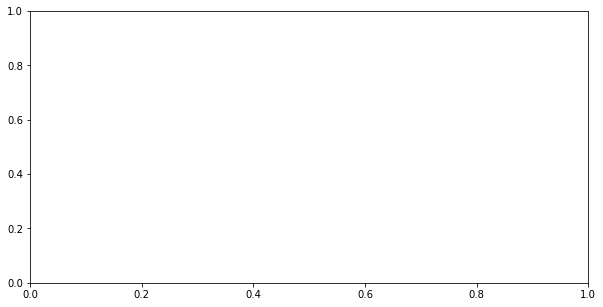

In [29]:
# df['Predicted_Signal'] = knn.predict(X)

# df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
# Cumulative_SPY_returns = df[split:]['SPY_returns'].cumsum()*100
 
# df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
# Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(model, color='r',label = 'SPY Returns')
# plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()